# Aulas 2 e 3: De Python até Scikit

Este é o *notebook* que utilizamos nas aulas dos dias 14/mar e 19/mar. Fizemos uma revisão sobre a linguagem de programação Python e falamos sobre NumPy, Pandas e Scikit-Learn.

Os comentários foram acrescentados após a aula e não são extensivos. Para uma revisão completa sobre NumPy e Scikit-Learn, consulte o nosso livro-texto *Data Science Handbook*.

- [Revisão leve de Python](#Revisão-leve-de-Python)
  - [Identificadores](#Identificadores)
  - [Contêineres](#Contêineres)
    - [Listas](#Listas)
    - [Indexação e Fatiamento ](#Indexação-e-Fatiamento-)
    - [Tuplas](#Tuplas)
    - [Dicionários](#Dicionários)
- [NumPy](#NumPy)
- [Motivação para o NumPy](#Motivação-para-o-NumPy)
  - [Propriedades do tensores](#Propriedades-do-tensores)
    - [Número de dimensões](#Número-de-dimensões)
    - [Tipos de dados](#Tipos-de-dados)
    - [Formato](#Formato)
    - [Formatos de tensores unidimensionais](#Formatos-de-tensores-unidimensionais)
  - [Operações do NumPy](#Operações-do-NumPy)
  - [Visões e fatiamento de tensores](#Visões-e-fatiamento-de-tensores)
  - [*Broadcast*](#Broadcast)
- [Pandas](#Pandas)
  - [Séries](#Séries)
  - [*Data frames*](#Data-frames)
- [Fazendo Aprendizado de Máquina com isso tudo](#Fazendo-Aprendizado-de-Máquina-com-isso-tudo)

# Revisão leve de Python

Todos os dados, em Python, são representados como objetos.

Na célula abaixo, você pode testar que até mesmo a literal é um objeto. Pressione `TAB`. Veja também uma demonstração adicional de como o Jupyter auxilia a completar código.ćodigo do Jupyter.

In [1]:
3.14

3.14

Declaração de uma função em Python. O operador `+=` faz com que a variável `P` receba a mensagem `__iadd__`, que realiza adição *in-loco* e, portanto, modifica o argumento. Essa é uma das maneiras de fazer inserção no final da lista.

In [2]:
def insere_pilha(P, x):
    P += [x]

Demonstração de inserção na lista:

In [3]:
l = []
insere_pilha(l, 1)

In [4]:
l

[1]

## Identificadores

Cada objeto possui um identificador. Esse identificador pode ser inspecionado com o comando `id`.

In [5]:
id(42)

9068032

Note que o Python pré-aloca alguns objetos da classe `int` e os reutiliza. As duas referência, `x` e `y`, "apontam" para o mesmo objeto.

In [6]:
x = 42

In [7]:
y = 42

In [8]:
id(x), id(y)

(9068032, 9068032)

In [9]:
x is y

True

O número 100.000 não possui um objeto pré-alocado, como o simples experimento a seguir revela.

In [10]:
x = 100000
y = 100000
id(x), id(y)

(140701720426544, 140701720426800)

In [11]:
x is y

False

## Contêineres

### Listas

Coleções de elementos que podem ser acessados sequencialmente.

Uma lista vazia é representada pelo literal `[]` ou pode ser instanciada explicitamente com `list`.

In [12]:
l = []

In [13]:
l = list()

A lista é um objeto mutável (*mutable*). Objetos mutáveis são caracterizados por possuírem métodos que mudam o estado do objeto quando chamados. Um exemplo é o método `list.append`, que insere um elemento ao final da lista.

In [14]:
l.append(1)
l

[1]

### Indexação e Fatiamento 

Os elementos da lista podem ser indexados com o operador `[idx]`. O primeiro elemento da lista está no índice $0$ e o último elemento pode ser acessado pelo índice $-1$.

In [15]:
l = [0, 1, 2, 3, 4, 5, 6]

In [16]:
l

[0, 1, 2, 3, 4, 5, 6]

In [17]:
l[0]

0

In [18]:
l[-1]

6

A notação `a:b:c` equivale aos elementos no intervalo $[a,b)$ com "passo" `c`.

In [19]:
l[0:3]

[0, 1, 2]

In [20]:
l[0:8:2]

[0, 2, 4, 6]

A notação `a:b:c` permite omissão de qualquer valor:

* Se `a` for omitido, Python assume `a = 0`
* Se `b` for omitido, Python assume `b = len(L) + 1`
* Se `c` for omitido, Python assume `c = 1`

In [21]:
l[:3]

[0, 1, 2]

Valores negativos podem desconsiderar elementos da lista. Por exemplo, todos os elementos, exceto o último:

In [22]:
l[:-1]

[0, 1, 2, 3, 4, 5]

Ou todos os elementos, exceto os dois últimos:

In [23]:
l[:-2]

[0, 1, 2, 3, 4]

Se o fatiamento for usado do lado esquerdo de uma atribuição, podemos alterar múltiplos valores da lista.

In [24]:
l

[0, 1, 2, 3, 4, 5, 6]

In [25]:
l[:3] = [1, 1, 1]

In [26]:
l

[1, 1, 1, 3, 4, 5, 6]

Por outro lado, se for usado do lado **direito** da atribuição, o fatiamento retorna uma cópia da lista.

In [27]:
y = l[:3]

In [28]:
y[0] = -1

In [29]:
y

[-1, 1, 1]

In [30]:
l

[1, 1, 1, 3, 4, 5, 6]

### Tuplas

Tuplas são um exemplo de objeto imutável. Objetos imutáveis são aqueles que não possuem métodos que alteram o estado interno do objeto.

Tuplas podem ser pensadas simplesmente como versões imutáveis das listas. A tupla vazia é a literal `()` ou pode ser instanciada através do construtor `tuple`. Uma lista pode ser convertida em uma tupla que contém os mesmos elementos.

In [31]:
t = tuple(l)

### Dicionários

O dicionário vazio pode ser criado a partir da literal `{}` ou através do construtor da classe `dict` sem argumentos.

In [32]:
dic_vazio = {}

Ou utilizando a notação `chave: valor`, podemos criar um dicionário com um conjunto de pares inicial.

In [33]:
dicio = {'chave':'valor', 'chave2':2}
dicio

{'chave': 'valor', 'chave2': 2}

# NumPy

In [34]:
import numpy as np

# Motivação para o NumPy

Como representar matrizes em Python?

Como representar a matriz

$$\begin{pmatrix}11 & 12 & 13 \\ 21 & 22 & 23 \\ 31 & 32 & 33\end{pmatrix}$$

Ou a sua transposta?

$$\begin{pmatrix}11 & 21 & 23 \\ 12 & 22 & 32 \\ 13 & 23 & 33\end{pmatrix}$$

Podemos usar listas de listas?

In [35]:
X = [[11, 12, 13], [21, 22, 23]]

In [36]:
X

[[11, 12, 13], [21, 22, 23]]

Um problema é que listas são heterogêneas. Isso significa, dentre outras coisas, que é difícil para o Python oferecer uma interface universal que seja adequada para cálculos.

A operação `+`, para listas, simplesmente efetua a concatenação.

In [37]:
l = [1, 'hey']

In [38]:
l = [[1], [1,2], [1,2,3]]

In [39]:
l + X

[[1], [1, 2], [1, 2, 3], [11, 12, 13], [21, 22, 23]]

Outro problema de representar matrizes como listas é que as operações envolvendo listas podem ser bastante lentas. Por exemplo, como faríamos multiplicação de duas matrizes?

$$X = \begin{pmatrix}11 & 12 & 13 \\ 21 & 22 & 23\end{pmatrix}$$

$$Y = \begin{pmatrix}11 & 12 \\ 21 & 22 \\ 31 & 32\end{pmatrix}$$

$$X \times Y = ?$$

In [40]:
X = [[11, 12, 13],
     [21, 22, 23]]

Y = [[11, 12],
     [21, 22],
     [31, 32]]

In [41]:
X_numpy = np.array(X)
Y_numpy = np.array(Y)

A função ingênua para essa multiplicação é um algoritmo $\mathcal{O}(n^3)$:

In [42]:
def matmul(m1, m2):
    m1_linhas = len(m1)
    m1_colunas = len(m1[0])
    
    m2_linhas = len(m2)
    m2_colunas = len(m2[0])
    
    if m1_colunas != m2_linhas:
        print("Erro")
        return None
    
    res = []
    for i in range(m1_linhas):
        res.append([0] * m2_colunas)
    
    for i in range(m1_linhas):
        for j in range(m2_colunas):
            for k in range(m1_colunas):
                res[i][j] = res[i][j] + m1[i][k] * m2[k][j]
    
    return res

Comparação de tempo de execução.

In [43]:
%timeit matmul(X, Y)

The slowest run took 9.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.51 µs per loop


In [44]:
%timeit np.dot(X_numpy, Y_numpy)

The slowest run took 21.53 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 609 ns per loop


Para matrizez maiores?

In [45]:
import random

In [46]:
def matriz_aleatoria(nlinhas, ncolunas, a=1, b=10, rng=random):
    """Gera uma matriz contendo valores aleatórios no
    intervalo [a, b]"""
    res = []
    for i in range(nlinhas):
        res.append([rng.randint(a, b) for i in range(ncolunas)])
    return res

In [47]:
X = matriz_aleatoria(100, 300)
Y = matriz_aleatoria(300, 200)

In [48]:
X_numpy = np.array(X)
Y_numpy = np.array(Y)

In [49]:
%timeit matmul(X, Y)

1 loop, best of 5: 742 ms per loop


In [50]:
%timeit np.dot(X_numpy, Y_numpy)

100 loops, best of 5: 4.84 ms per loop


## Propriedades do tensores
 
Todo vetor multidimensional do NumPy possui pelo menos três propriedades:

* Número de dimensões
* Formato
* Tipo de dados

Podemos inspecionar essas propriedades através dos atributos `ndim`, `shape` e `dtype` do objeto instanciado. 

In [51]:
import numpy as np

In [52]:
x = np.random.randint(1, 11, (3, 4, 5))

In [53]:
x

array([[[ 9,  1, 10,  1,  3],
        [ 9,  8,  8,  7,  6],
        [ 5,  3,  6,  4,  6],
        [ 1,  6, 10, 10,  5]],

       [[ 1, 10, 10,  1,  1],
        [ 3,  4,  4,  9,  8],
        [ 6,  5, 10,  1,  4],
        [10,  2,  7,  3,  1]],

       [[ 2,  9,  4,  4,  2],
        [10,  4,  8,  9,  8],
        [ 9,  9,  3, 10,  9],
        [ 5,  4,  6,  5,  7]]])

In [54]:
x.ndim

3

In [55]:
x.shape

(3, 4, 5)

In [56]:
x.dtype

dtype('int64')

### Número de dimensões

Um vetor é um tensor de uma dimensão:

$$u = \begin{pmatrix}1&2&3\end{pmatrix}$$

In [57]:
u = np.array([1,2,3])

In [58]:
u

array([1, 2, 3])

Um tensor de duas dimensões é uma matriz. 

$$X = \begin{pmatrix}11 & 12\\21 & 22\end{pmatrix}$$

In [59]:
X = np.array([[11, 12], [21, 22]], dtype=np.float)

In [60]:
X

array([[11., 12.],
       [21., 22.]])

In [61]:
X.dtype

dtype('float64')

### Tipos de dados

A tabela seguinte, extraída do livro "Python Data Science Handbook", lista todos os tipos de dados que podem ser armazenados em tensores do NumPy.

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

In [62]:
np.array([1, 'a'])

array(['1', 'a'], dtype='<U21')

### Formato

A terceira propriedade de tensores é seu formato. O formato de um tensor pode ser consultado pelo atributo `shape` do objeto instanciado e é uma tupla que indica o tamanho do tensor em todas as suas dimensões.

$$X = \begin{pmatrix}0 & 1\\2 & 3\\4 & 5\end{pmatrix}$$


In [63]:
np.array(range(6))

array([0, 1, 2, 3, 4, 5])

In [64]:
np.array(range(6)).reshape(3, 2)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [65]:
np.array(range(6)).reshape(3, 2).T

array([[0, 2, 4],
       [1, 3, 5]])

### Formatos de tensores unidimensionais

Em alguns contextos, é comum fazermos distinção entre vetores "linha" e vetores "coluna":

Exemplo de um vetor "linha"

$$u = \begin{pmatrix}1 & 2 & 3\end{pmatrix}$$

Exemplo de um vetor "coluna"

$$v = \begin{pmatrix}1\\2\\3\end{pmatrix}$$

A transposição de um vetor linha é um vetor coluna e vice-versa:

$$u^\intercal = \begin{pmatrix}1\\2\\3\end{pmatrix}$$

$$v^\intercal = \begin{pmatrix}1 & 2 & 3\end{pmatrix}$$

Entretanto, para o NumPy, não existe "orientação" de vetores. Um vetor é um vetor.

In [66]:
u = np.arange(1, 4)
u

array([1, 2, 3])

In [67]:
np.array_equal(u, u.T)

True

O mais próximo que temos de um vetor coluna é uma matriz com várias linhas e uma única coluna.

Podemos converter o vetor `u` em tal matriz selecionando todos os elementos de `u` em uma dimensão e utilizando o operador `np.newaxis` para acrescentar uma dimensão sem nenhum dado. Isso fará com que os valores de `u` sejam distribuídos ao longo das linhas de `X`

In [68]:
X = u[:, np.newaxis]

In [69]:
X

array([[1],
       [2],
       [3]])

Mas note que, embora `X`*pareça* um vetor linha, ele é uma matriz. Compare os números de dimensões e os formatos de `u` e `X`:

In [70]:
u.ndim

1

In [71]:
X.ndim

2

In [72]:
u.shape

(3,)

In [73]:
X.shape

(3, 1)

## Operações do NumPy

O NumPy suporta diversas operações que tornam o Python uma linguagem *matricial*. Por exemplo, podemos somar todos os valores de um vetor com um escalar ou somar, ponto-a-ponto, os valores de dois vetores.

In [74]:
v = np.array([3, 2, 4])

In [75]:
u + 1

array([2, 3, 4])

In [76]:
u + v

array([4, 4, 7])

Ou então multiplicar dois vetores ponto-a-ponto.

In [77]:
u * v

array([ 3,  4, 12])

In [78]:
u = np.arange(1, 7)
v = u + 6

In [79]:
u

array([1, 2, 3, 4, 5, 6])

In [80]:
v

array([ 7,  8,  9, 10, 11, 12])

$$\begin{pmatrix}1\\2\\3\\4\\5\\6\end{pmatrix} + \begin{pmatrix}7\\8\\9\\10\\11\\12\end{pmatrix} = \begin{pmatrix}1+7\\2+8\\3+9\\4+10\\5+11\\6+12\end{pmatrix}$$

In [81]:
u + v

array([ 8, 10, 12, 14, 16, 18])

Lembrando que o Python transforma essas operações em passagem de mensagens. A operação `u + v` equivale a chamar a função `numpy.add`.

In [82]:
np.add(u, v)

array([ 8, 10, 12, 14, 16, 18])

In [83]:
x = np.linspace(0, 2, 33)
x

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    ])

In [84]:
import matplotlib.pyplot as plt

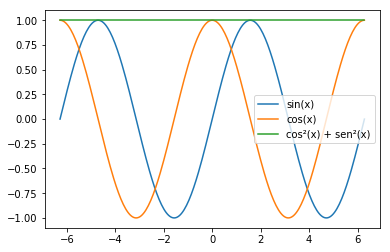

In [85]:
x = np.linspace(-2*np.pi, 2*np.pi, 256)
plt.plot(x, np.sin(x), label='sin(x)');
plt.plot(x, np.cos(x), label='cos(x)');
plt.plot(x, np.cos(x)**2 + np.sin(x)**2, label='cos²(x) + sen²(x)');
plt.legend();

Operações estão disponíveis também para matrizes. Todas as operações ilustradas a seguir são feitas ponto-a-ponto.

$$X = \begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{pmatrix}$$

$$Y = \begin{pmatrix}1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1\end{pmatrix}$$

In [86]:
X = np.arange(1, 10).reshape(3, 3)
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [87]:
u = np.ones(3)
u

array([1., 1., 1.])

In [88]:
Y = np.array([u, u*0, -u])
Y

array([[ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1., -1., -1.]])

In [89]:
X ** 2

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [90]:
X * Y

array([[ 1.,  2.,  3.],
       [ 0.,  0.,  0.],
       [-7., -8., -9.]])

Para realizar a multiplicação de matrizes que estamos acostumados, podemos utilizar `numpy.dot`.

In [91]:
matmul(X, Y)

[[-2.0, -2.0, -2.0], [-2.0, -2.0, -2.0], [-2.0, -2.0, -2.0]]

In [92]:
np.dot(X, Y)

array([[-2., -2., -2.],
       [-2., -2., -2.],
       [-2., -2., -2.]])

Funções universais ao longo de eixos.

In [93]:
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [94]:
X = np.arange(1, 13).reshape(4,3)
X

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

Se realizarmos uma operação de soma **ao longo do eixo 0** (que são as linhas), então estamos dizendo para somar os elementos distribuídos nas linhas. O resultado é uma soma das colunas.

In [95]:
X.sum(axis=0)

array([22, 26, 30])

Equivalentemente, especificando que os dados estão distribuídos ao longo das colunas, fazemos a soma das linhas.

In [96]:
X.sum(axis=1)

array([ 6, 15, 24, 33])

## Visões e fatiamento de tensores

Assim como listas, tensores também suportam fatiamento. A principal diferença, é claro, é que os tensores podem ser fatiados em múltiplas dimensões.

In [97]:
lista = [0, 1, 2, 3, 4, 5, 6]

In [98]:
lista[2:5]

[2, 3, 4]

Selecionando todos os elementos da primeira linha:

In [99]:
X[0, :]

array([1, 2, 3])

In [100]:
type(X[0, :])

numpy.ndarray

In [101]:
X[3,:].sum()

33

Selecionando a coluna `2` em todas as linhas (isto é, a terceira coluna):

In [102]:
X[:, 2]

array([ 3,  6,  9, 12])

Selecionando todas as linhas e todas as colunas, exceto a última:

In [103]:
X[:, :-1]

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

E, para o próximo exemplo, selecionaremos as duas primeiras linhas e todas as colunas, exceto a última.

Para recordar, esta é a matriz `X` completa:

In [104]:
X

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

E aqui está a seleção:

In [105]:
X[2:, :-1]

array([[ 7,  8],
       [10, 11]])

*Fancy indexing* ocorre quando indexamos o tensor utilizando listas. O resultado terá formato determinado pelos índices. Por exemplo, se selecionarmos as linhas `0`, `2` e `3`, o resultado será uma matriz que tem formato `(3,3)` contendo as linhas especificadas.

In [106]:
X[[0, 2, 3], :]

array([[ 1,  2,  3],
       [ 7,  8,  9],
       [10, 11, 12]])

Podemos combinar *fancy indexing* com fatiamento. Aqui, selecionamos as três linhas e fatiamos as colunas alternadamente.

In [107]:
X[[0, 2, 3], ::2]

array([[ 1,  3],
       [ 7,  9],
       [10, 12]])

## *Broadcast*

*Broadcast* ocorre quando tensores de dimensões diferentes são utilizados como entrada para funções universais.

Suponha, por exemplo, que temos uma matriz de formato `(4,3)` e um vetor de formato `(3,)`.

In [108]:
X = np.arange(1, 13).reshape(4,3)
X

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [109]:
u = np.array([1, 2, 3])
u

array([1, 2, 3])

Quando fazemos uma soma entre  essa matriz e esse vetor, ocorre o *broadcast* do vetor ao longo das linhas da matriz, como ilustrado nos *slides*.

In [110]:
X + u

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12],
       [11, 13, 15]])

Um outro exemplo de *broadcast* ocorre quando fazemos uma operação entre um vetor e um "falso vetor coluna" (que, na verdade, é uma matriz).

In [111]:
u = np.arange(1, 6)
u

array([1, 2, 3, 4, 5])

In [112]:
v = u.reshape(5, 1)
v

array([[1],
       [2],
       [3],
       [4],
       [5]])

Para realizar essa operação, deve ocorrer o *broadcast* dos dois tensores. O exemplo completo pode ser encontrado no VanderPlas, mas, sucintamente, o *broadcast* de `u` ao longo das linhas de `v` produz uma matriz equivalente à seguinte:

$$\begin{pmatrix}1 & 2 & 3 & 4 & 5\\
1 & 2 & 3 & 4 & 5\\
1 & 2 & 3 & 4 & 5\\
1 & 2 & 3 & 4 & 5\\
1 & 2 & 3 & 4 & 5\end{pmatrix}$$

enquanto que o *broadcast* de *v* ao longo das linhas dessa matriz produz uma matriz equivalente à seguinte:

$$\begin{pmatrix}1 & 1 & 1 & 1 & 1\\
2 & 2 & 2 & 2 & 2\\
3 & 3 & 3 & 3 & 3\\
4 & 4 & 4 & 4 & 4\\
5 & 5 & 5 & 5 & 5\end{pmatrix}$$

A operação `u + v` equivale à  soma dessas duas matrizes.

In [113]:
u + v

array([[ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])

# Pandas

## Séries

Podemos pensar nas séries do Pandas como vetores do NumPy associados a índices. Elas são implementadas pela classe `pandas.Series`.

In [114]:
import pandas as pd

In [115]:
type(pd.Series), type(pd.DataFrame)

(type, type)

Uma série de números primos:

In [116]:
primos = pd.Series([2, 3, 5, 7, 11, 13, 17, 19])

In [117]:
primos

0     2
1     3
2     5
3     7
4    11
5    13
6    17
7    19
dtype: int64

In [118]:
primos.index

RangeIndex(start=0, stop=8, step=1)

In [119]:
primos.values

array([ 2,  3,  5,  7, 11, 13, 17, 19])

In [120]:
type(primos.values)

numpy.ndarray

Todas as séries possuem:

- Uma coleção sequencial de dados
- Uma estrutura de índices que utiliza **rótulos** para acessar os dados

O índice pode ser explicitamente definido.

In [121]:
valores = [2, 3, 5, 7, 11, 13, 17, 19];

In [122]:
indice = range(1, 1 + len(valores))

In [123]:
primos = pd.Series(valores, indice)
primos

1     2
2     3
3     5
4     7
5    11
6    13
7    17
8    19
dtype: int64

Índices não precisam ser números inteiros. Podem ser *strings*...

In [124]:
paises = pd.Series([2, 3, 2], index=['Brasil', 'EUA', 'China'])
paises

Brasil    2
EUA       3
China     2
dtype: int64

In [125]:
paises['Brasil']

2

In [126]:
paises['Brasil':'EUA']

Brasil    2
EUA       3
dtype: int64

O Pandas também permite operações numéricas com séries.

In [127]:
primos

1     2
2     3
3     5
4     7
5    11
6    13
7    17
8    19
dtype: int64

In [128]:
np.exp(primos)

1    7.389056e+00
2    2.008554e+01
3    1.484132e+02
4    1.096633e+03
5    5.987414e+04
6    4.424134e+05
7    2.415495e+07
8    1.784823e+08
dtype: float64

## *Data frames*

Outra estrutura de dados fundamental do Pandas é o *data frame*. Os *data frames* estão para matrizes assim como as séries estão para vetores. O *data frame* possui **dois** índices: um para as linhas e um para as colunas.

Carregue a base de dados iris como um *data frame*.

In [129]:
import seaborn as sns

In [130]:
iris = sns.load_dataset('iris')

In [131]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Mostre os índices das linhas e das colunas.

In [132]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [133]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [134]:
iris['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
5      1.7
6      1.4
7      1.5
8      1.4
9      1.5
10     1.5
11     1.6
12     1.4
13     1.1
14     1.2
15     1.5
16     1.3
17     1.4
18     1.7
19     1.5
20     1.7
21     1.5
22     1.0
23     1.7
24     1.9
25     1.6
26     1.6
27     1.5
28     1.4
29     1.6
      ... 
120    5.7
121    4.9
122    6.7
123    4.9
124    5.7
125    6.0
126    4.8
127    4.9
128    5.6
129    5.8
130    6.1
131    6.4
132    5.6
133    5.1
134    5.6
135    6.1
136    5.6
137    5.5
138    4.8
139    5.4
140    5.6
141    5.1
142    5.1
143    5.9
144    5.7
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

Mostre o `loc` para acessar os índices.

In [135]:
iris.loc[:, 'petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
5      0.4
6      0.3
7      0.2
8      0.2
9      0.1
10     0.2
11     0.2
12     0.1
13     0.1
14     0.2
15     0.4
16     0.4
17     0.3
18     0.3
19     0.3
20     0.2
21     0.4
22     0.2
23     0.5
24     0.2
25     0.2
26     0.4
27     0.2
28     0.2
29     0.2
      ... 
120    2.3
121    2.0
122    2.0
123    1.8
124    2.1
125    1.8
126    1.8
127    1.8
128    2.1
129    1.6
130    1.9
131    2.0
132    2.2
133    1.5
134    1.4
135    2.3
136    2.4
137    1.8
138    1.8
139    2.1
140    2.4
141    2.3
142    1.9
143    2.3
144    2.5
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [136]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

O `loc` pode ser utilizado para acessar linhas e colunas, por rótulos, ao mesmo tempo. **Veja!!** Na célula abaixo, o intervalo `0:10` não é o fatiamento tradicional do Python, mas sim os rótulos das linhas. Podemos afirmar isso com certeza porque o resultado **inclui** a linha cujo rótulo é `10`.

In [137]:
iris.loc[0:10, 'sepal_width':'petal_width']

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
5,3.9,1.7,0.4
6,3.4,1.4,0.3
7,3.4,1.5,0.2
8,2.9,1.4,0.2
9,3.1,1.5,0.1


Por outro lado, o fatiamento tradicional, utilizando a notação posicional do `iloc`, sempre especifica o intervalo aberto ao lado direito.

In [138]:
iris.iloc[0:10, 1:3]

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
5,3.9,1.7
6,3.4,1.4
7,3.4,1.5
8,2.9,1.4
9,3.1,1.5


In [139]:
iris.iloc[:, :-1].head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


A função `describe` existe tanto em séries quando em *data frames* e produz uma coleção de estatísticas interessantes sobre os valores não ausentes dos dados.

In [140]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Fazendo Aprendizado de Máquina com isso tudo

Visualização do histograma do atributo `petal_width` com `np.histogram` e agrupamento por espécies.

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Separação do *data frame* em características e classes.

In [143]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [144]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [145]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Instanciamos um objeto da classe `DecisionTreeClassifier`. Objetos dessa classe representam tanto o algoritmo de indução quando o modelo induzido. Vamos estipular que a árvore terá uma profundidade máxima 2.

In [146]:
clf = DecisionTreeClassifier(max_depth=2)

Para treinar o modelo, utilizamos o método `fit`, que irá "ajustar" os parâmetros do modelo aos dados. O método `fit` recebe os vetores de características dos exemplos e seus rótulos.

In [147]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Vamos calcular o erro empírico, isto é, o erro do classificador nos próprios exemplos de treinamento.

In [148]:
Xpred = X

In [149]:
y_true = y

In [150]:
y_pred = clf.predict(X)

In [151]:
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

O Scikit implementa várias métricas de avaliação dos modelos. A função `accuracy_score` calcula a acurácia, que é o complemento do erro. Ou seja, $\text{Acc} = 1 - \text{Err}$.

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
accuracy_score(y_pred, y_true)

0.96

A acurácia do modelo foi de $96\%$, o que significa que classificamos corretamente $96\%$ das flores.

Por que não $100\%$ se testamos no próprio conjunto de treinamento?

Nem todos os modelos obtêm $100\%$ de acurácia no conjunto de treinamento. Além disso, mesmo modelos que o fazem não o fazem para todos os conjuntos. O conjunto `iris` é bastante simples e um modelo de árvore de decisão é certamente capaz de classificar corretamente todos os exemplos de treinamento. Nosso modelo não conseguiu $100\%$ pela decisão de limitar a profundidade da árvore. Você pode remover esse hiperparâmetro do código e reproduzir o experimento.

Finalmente, o Seaborn é capaz de gerar aquela mesma coleção de gráficos de espalhamento que observamos no Weka. Na diagonal principal, são mostrados gráficos de estimativas de FDP.

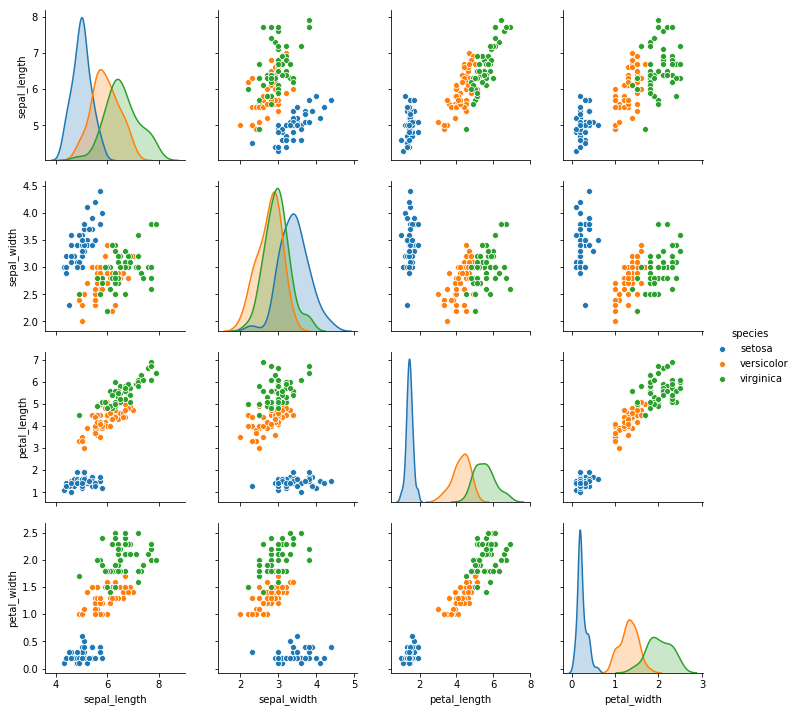

In [154]:
sns.pairplot(iris, hue='species');